In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [9]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

In [10]:
df.shape

(200, 5)

In [11]:
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [15]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [16]:
df.drop('CustomerID', axis=1, inplace=True)

#### Data Visualization

#### Univariate Analysis

In [17]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
47,Female,27,40,47
94,Female,32,60,42
137,Male,32,73,73
193,Female,38,113,91
98,Male,48,61,42


In [18]:
numerical_features = []
categorical_features = []

for col in df.columns:  
    if df[col].nunique() > 50:
        numerical_features.append(col) 
    else:
        categorical_features.append(col) 

In [19]:
print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Categorical Features : ['Gender']


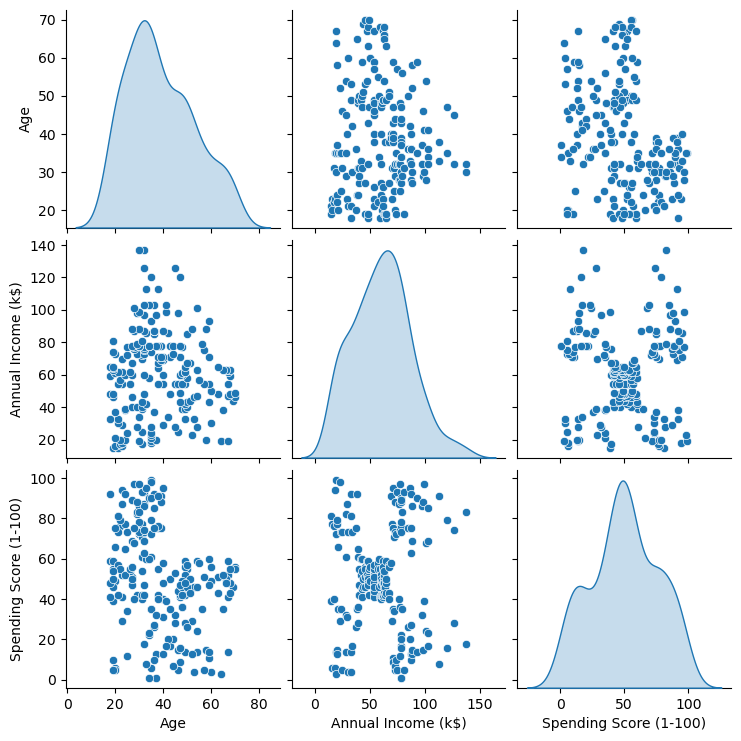

In [20]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
numerical_features_df = df[numerical_features]

sns.pairplot(numerical_features_df, diag_kind='kde')
plt.show()

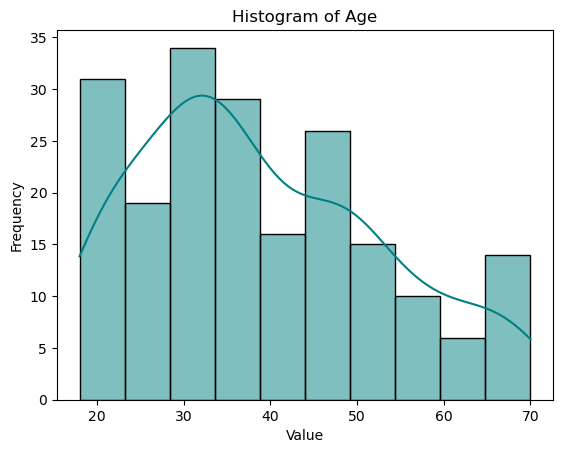

In [21]:
# Plot Histograms
sns.histplot(df['Age'], kde=True, color='teal', bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

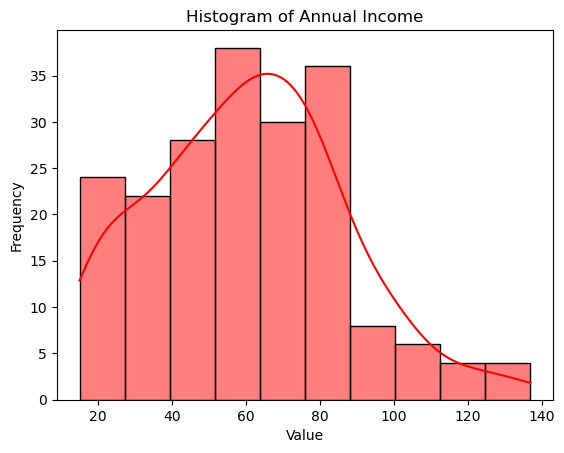

In [22]:
# Plot Histograms
sns.histplot(df['Annual Income (k$)'], kde=True, color='red', bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.show()

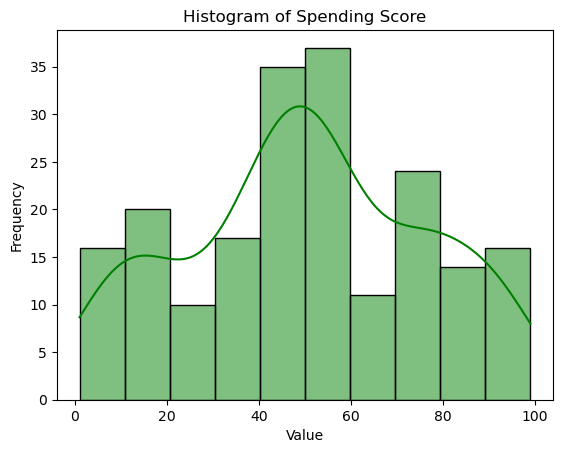

In [23]:
# Plot Histograms
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green', bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Spending Score')
plt.show()

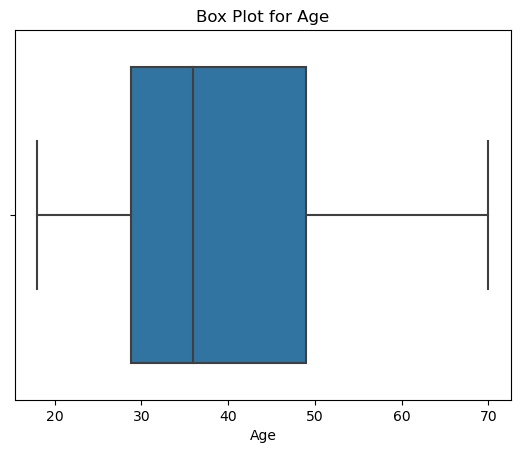

In [24]:
sns.boxplot(x=df['Age'])
plt.title('Box Plot for Age')
plt.show()

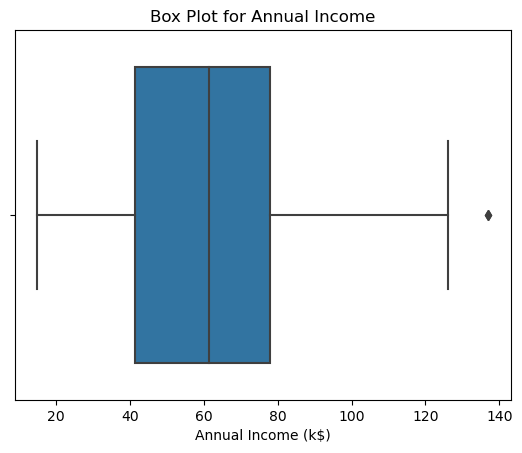

In [25]:
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Box Plot for Annual Income')
plt.show()

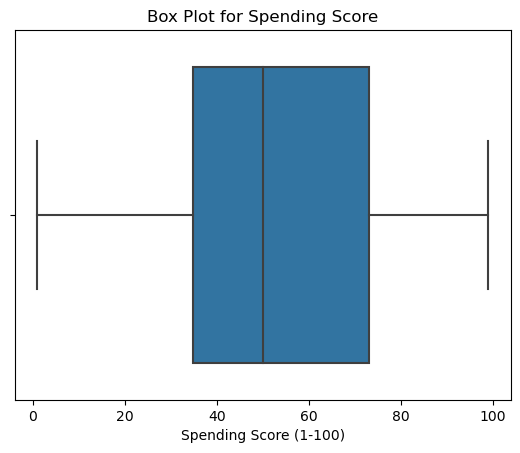

In [26]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Box Plot for Spending Score')
plt.show()

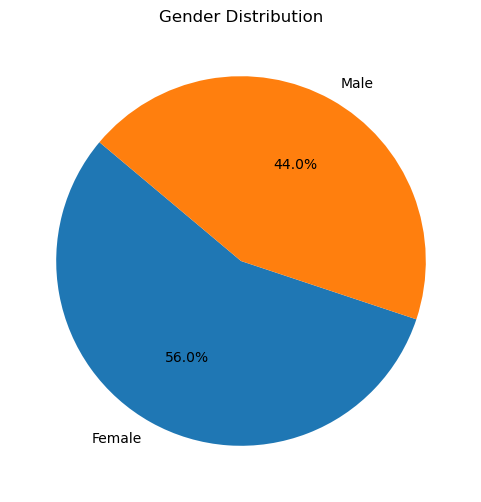

In [27]:
gender_distribution = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

###### Univariate Analysis with Gender as Legend

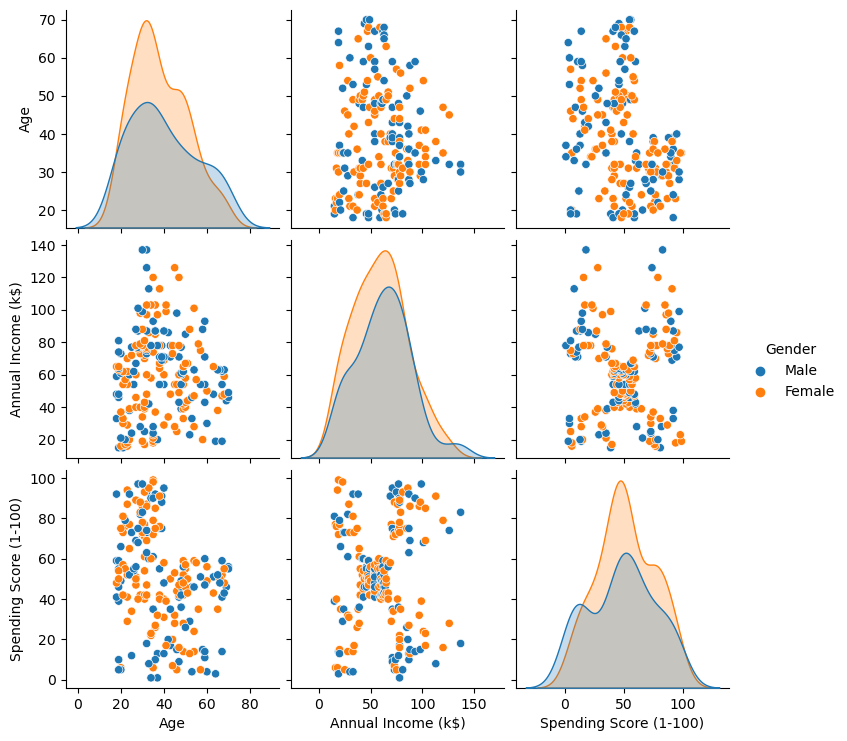

In [28]:
sns.pairplot(df,hue='Gender')
plt.show()

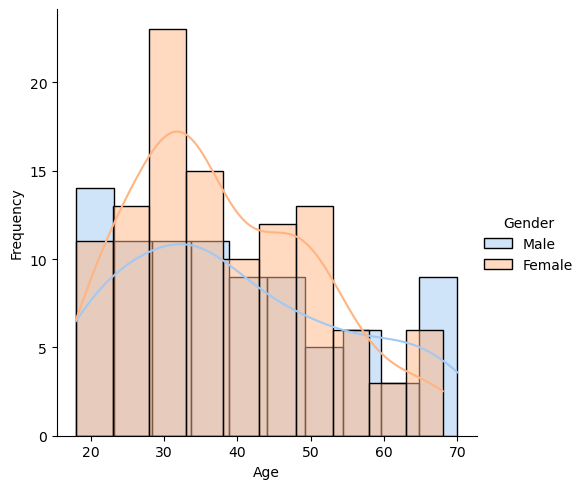

In [29]:
g = sns.FacetGrid(df, hue='Gender', palette='pastel', height=5)
g.map(sns.histplot, 'Age', kde=True, bins=10)
g.set_axis_labels('Age', 'Frequency')
g.set_titles('Histogram of Age')
g.add_legend()
plt.show()

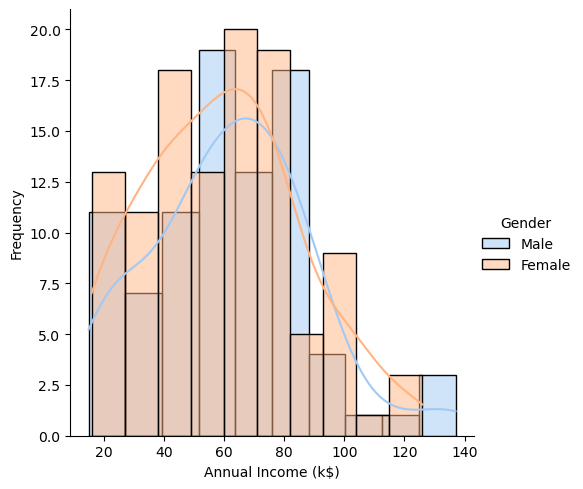

In [30]:
g = sns.FacetGrid(df, hue='Gender', palette='pastel', height=5)
g.map(sns.histplot, 'Annual Income (k$)', kde=True, bins=10)
g.set_axis_labels('Annual Income (k$)', 'Frequency')
g.set_titles('Histogram of Annual Income (k$)')
g.add_legend()
plt.show()

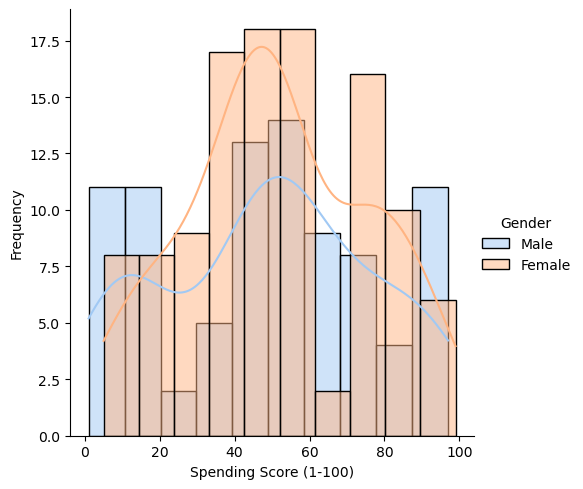

In [31]:
g = sns.FacetGrid(df, hue='Gender', palette='pastel', height=5)
g.map(sns.histplot, 'Spending Score (1-100)', kde=True, bins=10)
g.set_axis_labels('Spending Score (1-100)', 'Frequency')
g.set_titles('Histogram of Spending Score (1-100)')
g.add_legend()
plt.show()

In [32]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [33]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [34]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Feature Engineering

#### 1. Encoding Categorical Values

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
df['Gender']= le.fit_transform(df['Gender'])

#### 2. Add Additional Columns

In [38]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [39]:
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle-Aged'
    else:
        return 'Old'

df['Age_Category'] = df['Age'].apply(categorize_age)
print(df[['Age', 'Age_Category']].head())

   Age Age_Category
0   19        Young
1   21        Young
2   20        Young
3   23        Young
4   31  Middle-Aged


In [40]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [41]:
def categorize_income(income):
    if income < 40:
        return 'Low Income'
    elif income < 70:
        return 'Medium Income'
    else:
        return 'High Income'

df['Income_Category'] = df['Annual Income (k$)'].apply(categorize_income)

print(df[['Annual Income (k$)', 'Income_Category']].head())

   Annual Income (k$) Income_Category
0                  15      Low Income
1                  15      Low Income
2                  16      Low Income
3                  16      Low Income
4                  17      Low Income


In [42]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [43]:
def categorize_spending(score):
    if score < 40:
        return 'Low Spending'
    elif score < 70:
        return 'Medium Spending'
    else:
        return 'High Spending'

df['Spending_Category'] = df['Spending Score (1-100)'].apply(categorize_spending)

print(df[['Spending Score (1-100)', 'Spending_Category']].head())

   Spending Score (1-100) Spending_Category
0                      39      Low Spending
1                      81     High Spending
2                       6      Low Spending
3                      77     High Spending
4                      40   Medium Spending


In [44]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Category,Income_Category,Spending_Category
0,1,19,15,39,Young,Low Income,Low Spending
1,1,21,15,81,Young,Low Income,High Spending
2,0,20,16,6,Young,Low Income,Low Spending
3,0,23,16,77,Young,Low Income,High Spending
4,0,31,17,40,Middle-Aged,Low Income,Medium Spending


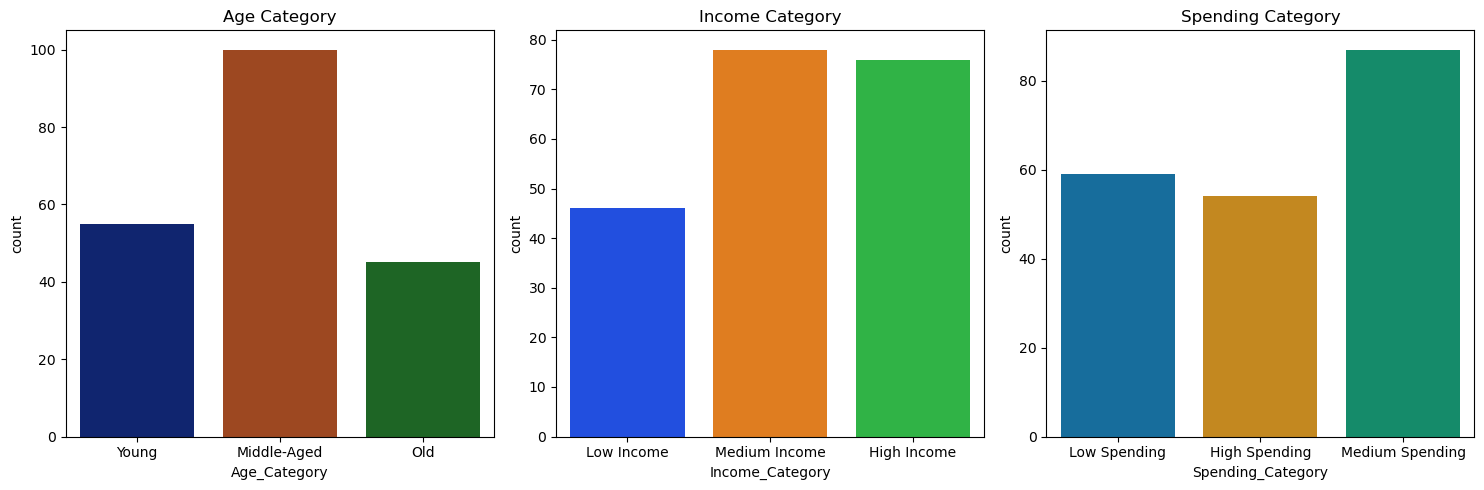

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Age_Category', data=df, palette='dark')
plt.title('Age Category')

plt.subplot(1, 3, 2)
sns.countplot(x='Income_Category', data=df, palette='bright')
plt.title('Income Category')

plt.subplot(1, 3, 3)
sns.countplot(x='Spending_Category', data=df, palette='colorblind')
plt.title('Spending Category')

plt.tight_layout()
plt.show()

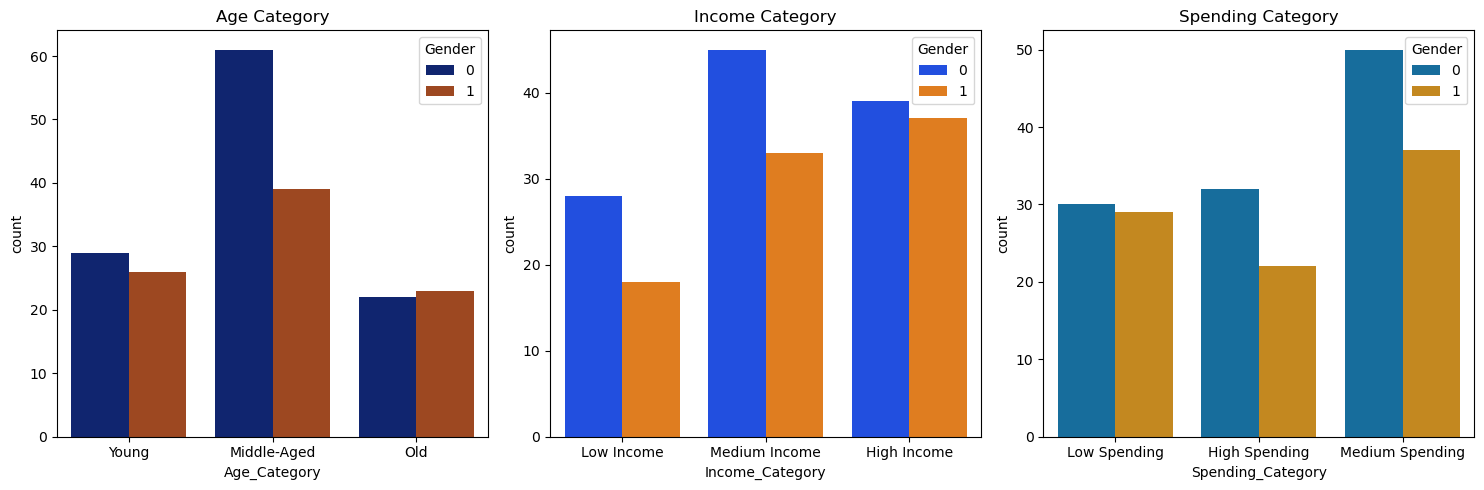

In [46]:
## Female - 0 , Male - 1

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Age_Category', hue='Gender', data=df, palette='dark')
plt.title('Age Category')

plt.subplot(1, 3, 2)
sns.countplot(x='Income_Category', hue='Gender', data=df, palette='bright')
plt.title('Income Category')

plt.subplot(1, 3, 3)
sns.countplot(x='Spending_Category', hue='Gender', data=df, palette='colorblind')
plt.title('Spending Category')

plt.tight_layout()
plt.show()


In [47]:
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Category,Income_Category,Spending_Category
195,0,35,120,79,Middle-Aged,High Income,High Spending
196,0,45,126,28,Middle-Aged,High Income,Low Spending
197,1,32,126,74,Middle-Aged,High Income,High Spending
198,1,32,137,18,Middle-Aged,High Income,Low Spending
199,1,30,137,83,Middle-Aged,High Income,High Spending


In [48]:
df.drop(columns=['Age_Category', 'Income_Category', 'Spending_Category'], axis=1, inplace=True)

In [49]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### K MEANS CLUSTERING

###### Standardization

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

###### Segmentation

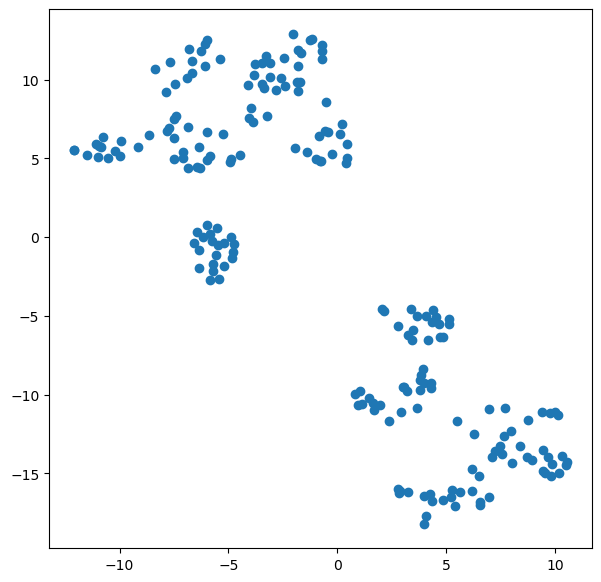

In [52]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(scaled_df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [53]:
from sklearn.cluster import KMeans

In [54]:
wcss=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(scaled_df)
    wcss.append(model.inertia_)

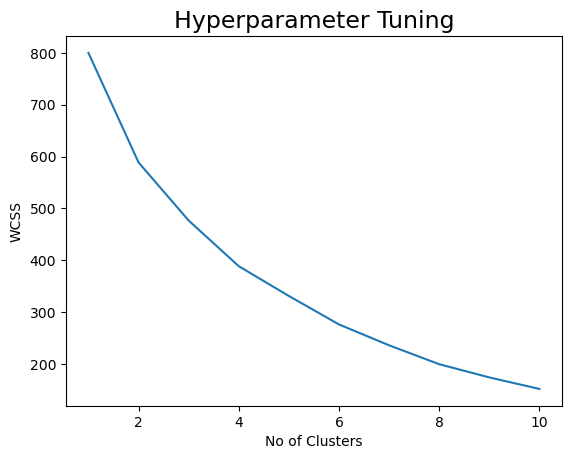

In [55]:
plt.plot(range(1,11),wcss)
plt.title('Hyperparameter Tuning', fontsize=17)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
final_model = KMeans(n_clusters=6,random_state=42)

In [57]:
final_model.fit(scaled_df)

KMeans(n_clusters=6, random_state=42)

In [58]:
final_model.labels_

array([1, 1, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 3, 2, 3, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 3, 1, 0, 2, 0, 2, 0, 2, 0, 1, 3, 2,
       0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 0, 0, 3, 1,
       0, 0, 1, 2, 3, 0, 0, 0, 3, 1, 0, 3, 2, 0, 3, 1, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 1, 3, 0, 2, 1, 0, 2, 3, 1, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3,
       3, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 5, 4, 3, 1, 3, 1, 3, 1,
       5, 4, 5, 4, 5, 1, 5, 4, 0, 1, 5, 4, 5, 1, 3, 4, 5, 1, 5, 1, 5, 4,
       5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 3, 4, 5, 4, 5, 1, 5, 1, 5, 1, 5, 4,
       3, 1, 3, 1, 5, 4, 5, 4, 5, 1, 5, 1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4])

In [59]:
cluster_labels = final_model.labels_

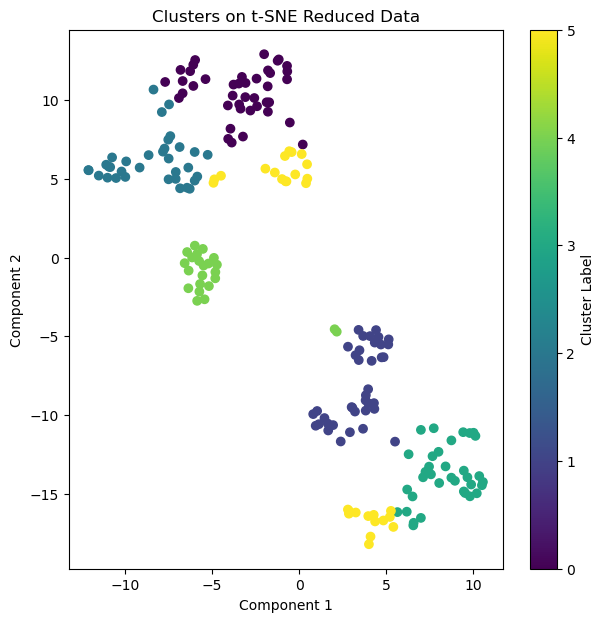

In [60]:
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters on t-SNE Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [61]:
df['Label']=final_model.labels_

In [62]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2


In [63]:
grp=df.groupby('Label')

In [64]:
for x,y in grp:
    print(y)
    print('-'*50)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Label
6         0   35                  18                       6      0
12        0   58                  20                      15      0
22        0   46                  25                       5      0
24        0   54                  28                      14      0
26        0   45                  28                      32      0
28        0   40                  29                      31      0
34        0   49                  33                      14      0
36        0   42                  34                      17      0
38        0   36                  37                      26      0
40        0   65                  38                      35      0
44        0   49                  39                      28      0
46        0   50                  40                      55      0
50        0   49                  42                      52      0
54        0   50                  43            

In [65]:
grp.agg('mean')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Label,,,,
0,0.000000,50.609756,49.658537,40.146341
1,1.000000,28.105263,58.342105,71.315789
2,0.000000,26.000000,39.529412,59.500000
3,1.000000,55.628571,52.828571,36.200000
4,0.086957,32.086957,90.000000,81.391304
5,0.448276,36.482759,89.517241,18.000000


#### HIERARCHICAL CLUSTERING

In [66]:
df1 = pd.read_csv('Mall_Customers.csv')

In [67]:
df1['Gender']= le.fit_transform(df1['Gender'])

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
scaled_df1 = scaler.fit_transform(df1)

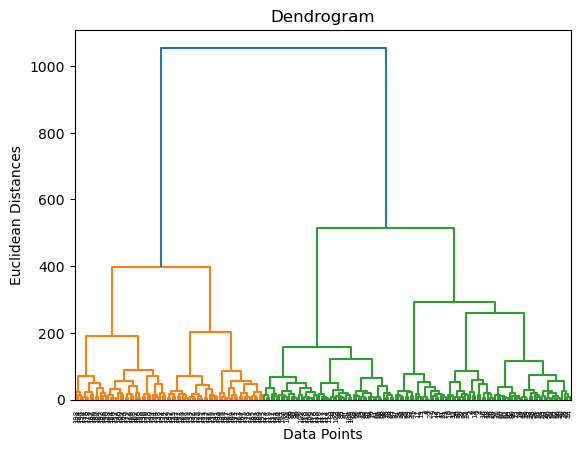

In [71]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
model1 = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')

In [74]:
model1.fit(scaled_df1)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=6)

In [75]:
model1.labels_

array([4, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 4, 1, 4, 2, 1, 2, 4,
       1, 4, 1, 4, 1, 4, 1, 1, 2, 1, 2, 4, 1, 1, 1, 1, 1, 1, 5, 4, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 2, 4, 5, 5, 2, 4,
       1, 5, 4, 1, 2, 1, 5, 5, 2, 4, 1, 2, 3, 1, 2, 2, 2, 1, 3, 2, 5, 3,
       3, 3, 5, 4, 2, 3, 3, 4, 3, 3, 2, 4, 3, 3, 2, 4, 2, 3, 5, 2, 2, 2,
       2, 3, 3, 4, 3, 3, 5, 3, 3, 3, 4, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 0], dtype=int64)

In [76]:
cluster_labels1 = model1.labels_

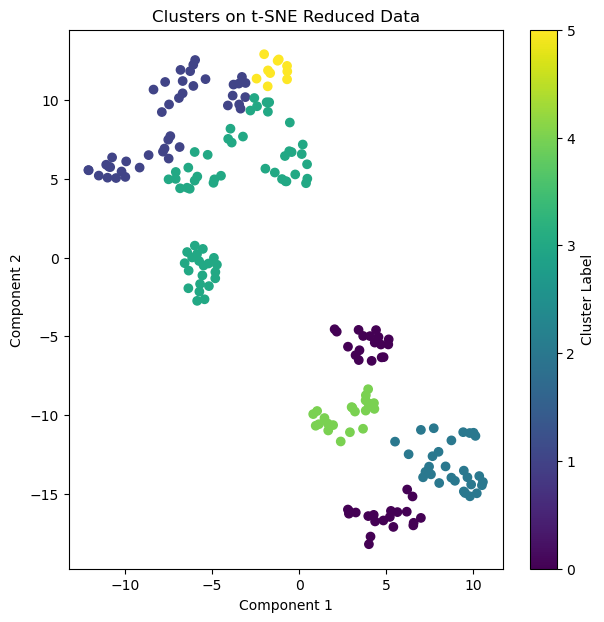

In [77]:
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels1, cmap='viridis')
plt.title('Clusters on t-SNE Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [78]:
df1['Labels'] = model1.labels_

In [79]:
grp1 = df1.groupby('Labels')

In [80]:
for x,y in grp1:
    print(y)
    print('_'*50)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
123         124       1   39                  69                      91   
126         127       1   43                  71                      35   
127         128       1   40                  71                      95   
128         129       1   59                  71                      11   
129         130       1   38                  71                      75   
130         131       1   47                  71                       9   
131         132       1   39                  71                      75   
134         135       1   20                  73                       5   
137         138       1   32                  73                      73   
138         139       1   19                  74                      10   
141         142       1   32                  75                      93   
144         145       1   25                  77                      12   
145         

In [81]:
grp1.agg('mean')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Labels,,,,,
0,159.947368,1.0,36.552632,86.078947,46.552632
1,37.238095,0.0,35.928571,33.404762,49.833333
2,66.551724,1.0,55.896552,46.448276,40.551724
3,142.966667,0.0,35.533333,78.483333,52.883333
4,55.476190,1.0,23.476190,40.857143,63.047619
5,78.500000,0.0,62.600000,52.400000,50.500000


In [82]:
from scipy.cluster import hierarchy

In [83]:
ln = hierarchy.linkage(scaled_df, method='complete')

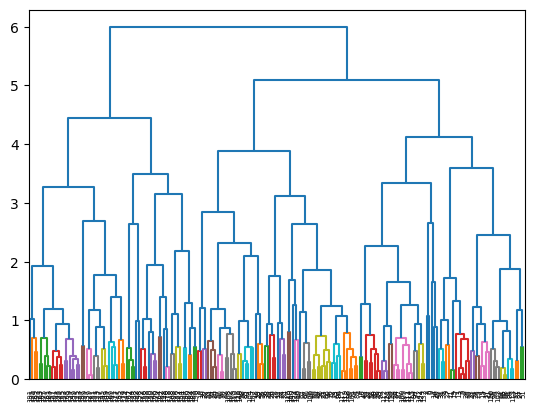

In [84]:
dn = hierarchy.dendrogram(ln, color_threshold=0.8)

#### DBSCAN

In [85]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [86]:
df2 = pd.read_csv('Mall_Customers.csv')

In [87]:
df2['Gender']= le.fit_transform(df2['Gender'])

In [88]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [89]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [90]:
# Apply DBSCAN with Different Parameters
dbscan = DBSCAN(eps=1, min_samples=2)
labels = dbscan.fit_predict(df2_scaled)

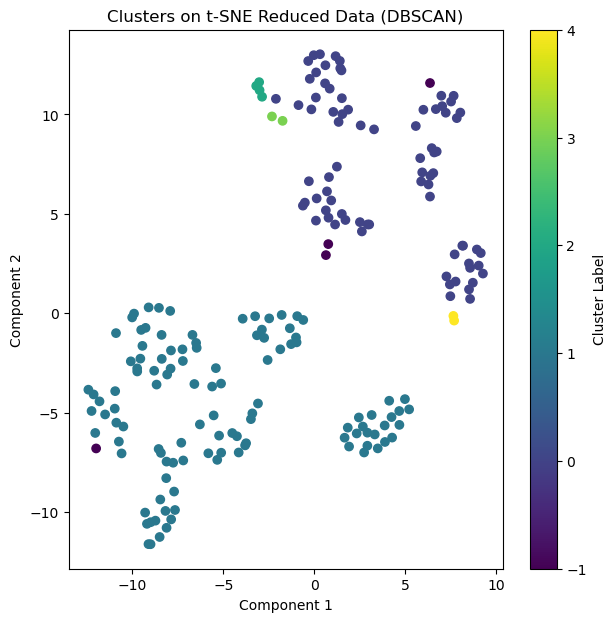

In [91]:
# Visualize clusters on t-SNE Reduced Data
model_tsne = TSNE(n_components=2, random_state=0)
tsne_data = model_tsne.fit_transform(df2_scaled)

plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis')
plt.title('Clusters on t-SNE Reduced Data (DBSCAN)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [92]:
dbscan_model = DBSCAN(eps=1, min_samples=2)

In [93]:
# Fit DBSCAN Model to the Scaled Data
dbscan_model.fit(df2_scaled)

DBSCAN(eps=1, min_samples=2)

In [94]:
# Get the Cluster Labels
cluster_labels = dbscan_model.labels_

# Print the Cluster Labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: [-1  0 -1  1  1  1  1  1  2  1  2  1  1  1  3  0  1  0  0  1  3  0  1  0
  1  0  1  0  1  1  2  1  2  0  1  1  1  1  1  1  1  0  0  1  1  1  1  1
  1  1  1  0  1  0  1  0  1  0  1  0  0  0  1  1  0  0  1  1  0  1  0  1
  1  1  0  0  1  0  1  1  0  0  0  1  1  0  1  1  1  1  1  0  0  1  1  0
  1  1  0  0  1  1  0  0  0  1  1  0  0  0  0  1  1  0  1  1  1  1  1  1
  0  1  1  0  1  1  0  0  0  0  0  0  1  1  0  1  1  0  0  1  1  0  1  1
  0  0  0  1  1  0  0  0  1  1  1  1  0  1  0  1  1  1  0  1  0  1  0  1
  1  0  0  0  0  0  1  1  0  0  0  0  1  1  0  1  1  0  1  0  1  1  1  1
 -1  1  1  1  1  4 -1  4]


In [95]:
df2.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
8,9,1,64,19,3
75,76,1,26,54,54
101,102,0,49,62,48
129,130,1,38,71,75
7,8,0,23,18,94


In [96]:
df2['Labels'] = dbscan_model.labels_

In [97]:
df2.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
20,21,1,35,24,35,3
41,42,1,24,38,92,0
44,45,0,49,39,28,1
143,144,0,32,76,87,1
145,146,1,28,77,97,0


In [98]:
grp2 = df2.groupby('Labels')

In [99]:
for x,y in grp2:
    print(y)
    print('_'*50)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
2             3       0   20                  16                       6   
192         193       1   33                 113                       8   
198         199       1   32                 137                      18   

     Labels  
0        -1  
2        -1  
192      -1  
198      -1  
__________________________________________________
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
1             2       1   21                  15                      81   
15           16       1   22                  20                      79   
17           18       1   20                  21                      66   
18           19       1   52                  23                      29   
21           22       1   25                  24                      73   
..          ...     ...  ...              